<a href="https://colab.research.google.com/github/DIAPkuik237/regression-multiple-neurone/blob/master/R%C3%A9gression_Simple_au_neurone_Artificiel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Poids appris (biais, étude, sommeil) : [-0.5  0.1  0.1]
📊 Score prédit (avant activation) : 0.39999999999999575
🔮 Probabilité de réussite (après sigmoïde) : 0.598687660112451


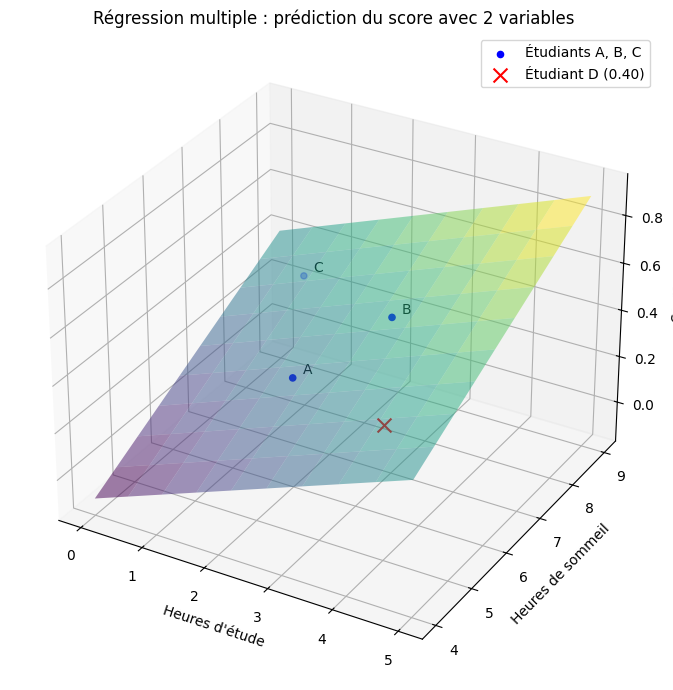

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 🔢 Données des étudiants A, B, C
# Colonnes : [heures d’étude, heures de sommeil]
X = np.array([
    [2, 6],  # Étudiant A
    [3, 7],  # Étudiant B
    [1, 8]   # Étudiant C
])
y = np.array([0.3, 0.5, 0.4])  # Scores

# ➕ On ajoute une colonne de 1 pour le biais (x0 = 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# 📐 Régression par moindres carrés
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
b, a1, a2 = theta_best  # Décomposition des poids

print("📌 Poids appris (biais, étude, sommeil) :", theta_best)

# 🔮 Prédiction brute pour l’étudiant D (4h étude, 5h sommeil)
x_d = np.array([1, 4, 5])  # [biais, x1, x2]
score_d = x_d @ theta_best

print("📊 Score prédit (avant activation) :", score_d)

# 🧠 Fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Application de la sigmoïde
proba_d = sigmoid(score_d)
print("🔮 Probabilité de réussite (après sigmoïde) :", proba_d)

# 🎨 Visualisation 3D
# Plan de régression
x_vals = np.linspace(0, 5, 10)
y_vals = np.linspace(4, 9, 10)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_grid = a1 * x_grid + a2 * y_grid + b

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points des étudiants
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Étudiants A, B, C')
ax.scatter(4, 5, score_d, color='red', s=100, marker='x', label=f'Étudiant D ({score_d:.2f})')

# Étiquettes des étudiants
noms = ['A', 'B', 'C']
for i, nom in enumerate(noms):
    ax.text(X[i, 0] + 0.1, X[i, 1] + 0.1, y[i] + 0.01, nom)

# Plan de régression (heatmap)
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='viridis')

# Axes
ax.set_xlabel("Heures d'étude")
ax.set_ylabel("Heures de sommeil")
ax.set_zlabel("Score")
ax.set_title("Régression multiple : prédiction du score avec 2 variables")
ax.legend()

plt.tight_layout()
plt.savefig("heatmap.png", dpi=300)
plt.show()

try:
    from google.colab import files
    files.download("heatmap.png")
except:
    print("✅ Image sauvegardée localement (pas en Colab).")


###✅ Résultat à l’exécution :

 Poids appris (biais, étude, sommeil) : [-0.5  0.1  0.1]

📊 Score prédit (avant activation) : 0.39999999999999575

🔮 Probabilité de réussite (après sigmoïde) : 0.598687660112451

### ⚠️ Remarque :

Les résultats varient en fonction des données utilisées.

Avec plus de données ou des données différentes, les poids et la prédiction changeraient.

C’est là qu’intervient l’apprentissage automatique, où le modèle s’améliore avec plus d’exemples — ce sera le sujet du prochain article !

##🧠 Interprétation :
Poids appris :

a1 = 0.1 → Chaque heure d’étude augmente le score de 0.1

a2 = 0.1 → Chaque heure de sommeil augmente aussi le score de 0.1

b = -0.5 → Le biais est négatif, il baisse la prédiction de base

Score prédictif brut ≈ 0.4

Après sigmoïde : probabilité ≈ 60%

Le modèle estime donc que l’étudiant D a environ 60 % de chances de réussir, selon ses 4h d’étude et 5h de sommeil.